In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import docx2txt
from textblob import TextBlob
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'textblob'

# Activity 1 - summarise a news article
- Get our text document

In [3]:
file = docx2txt.process('data/horseracing.docx')

In [12]:
tokens = word_tokenize(file)

In [13]:
tokens_lower = [token.lower() for token in tokens]

In [14]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [15]:
len(tokens_lower)

1155

In [29]:
# removing punctuation
clean_tokens_lower = [word for word in tokens_lower if word.isalpha()]

In [30]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
very_clean_tokens = [word for word in clean_tokens_lower if word not in stop_words]

In [35]:
len(very_clean_tokens)

513

In [31]:
freqdist = nltk.FreqDist(very_clean_tokens)

In [32]:
word_freq = dict((word, freq) for word, freq in freqdist.items() if not word.isdigit())

In [33]:
sorted_word_freq = sorted(word_freq.items(), key=lambda x:x[1], reverse=True)

In [34]:
sorted_word_freq

[('said', 18),
 ('horses', 14),
 ('racing', 13),
 ('horse', 11),
 ('ireland', 8),
 ('animal', 8),
 ('footage', 8),
 ('panorama', 6),
 ('animals', 6),
 ('aid', 6),
 ('abattoir', 5),
 ('cameras', 5),
 ('regulations', 5),
 ('elliott', 5),
 ('killed', 5),
 ('racehorses', 4),
 ('sent', 4),
 ('bbc', 4),
 ('trained', 4),
 ('also', 4),
 ('one', 4),
 ('welfare', 4),
 ('going', 4),
 ('slaughtered', 3),
 ('covert', 3),
 ('rules', 3),
 ('death', 3),
 ('told', 3),
 ('three', 3),
 ('industry', 3),
 ('recorded', 3),
 ('shot', 3),
 ('care', 3),
 ('euthanised', 3),
 ('prof', 3),
 ('mills', 3),
 ('got', 3),
 ('thousands', 2),
 ('slaughterhouses', 2),
 ('britain', 2),
 ('biggest', 2),
 ('showed', 2),
 ('designed', 2),
 ('protect', 2),
 ('appear', 2),
 ('abattoirs', 2),
 ('accept', 2),
 ('form', 2),
 ('abuse', 2),
 ('expert', 2),
 ('clear', 2),
 ('breaches', 2),
 ('gordon', 2),
 ('fate', 2),
 ('former', 2),
 ('end', 2),
 ('set', 2),
 ('drury', 2),
 ('sons', 2),
 ('young', 2),
 ('dene', 2),
 ('stansall', 2

# Convert the list into an nltk text object

In [37]:
from nltk import Text
nlkttext = Text(very_clean_tokens)

In [39]:
type(nlkttext)

nltk.text.Text

# Advanced techniques

In [40]:
# collocations - words that appear next to eachother frequently
nlkttext.collocations()

animal aid; accept form; dene stansall; designed protect; drury sons;
four days; travelling miles; rules designed; former racehorses; gordon
elliott; prof mills; animal abuse; britain ireland; form animal;
racehorses slaughtered; told panorama; footage recorded; aid cameras;
horses industry; horses shot


In [43]:
# concordance - fragments containing key words - indexed - text around that word
nlkttext.concordance('racing')

Displaying 13 of 13 matches:
animals owned trained biggest names racing covert recording also showed rules 
ng dead horse sent shockwaves world racing beyond elliott trained three winner
ghted fate many horses industry die racing training abattoirs freedom informat
nimal aid long campaigned end horse racing set covert cameras drury sons abatt
 shot abattoir previous illustrious racing careers winning thousands pounds th
nimals sent abattoir horses retired racing due injury said care killed elliott
hanised home simple prof mills said racing authorities guidelines clearly set 
uidelines clearly set happen horses racing career ends industry regulations re
sion animals responsible said horse racing ireland governing body racing irela
horse racing ireland governing body racing ireland said placed great importanc
proving already high standards care racing said would consider carefully issue
id said understand people attracted racing attracted poor welfare record numbe
d feel way panorama dar

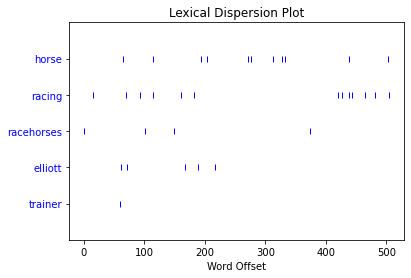

In [44]:
nlkttext.dispersion_plot(['horse', 'racing', 'racehorses', 'elliott', 'trainer'])

# Activity 2 - customer reviews & sentiment analysis

In [47]:
clothingdf = pd.read_csv('data/women_ecommerce.csv')

In [51]:
pd.set_option('display.max_colwidth', None) # seeing full text

In [52]:
clothingdf['Review Text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                             Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone w

In [58]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [60]:
clothingdf['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [62]:
TextBlob('regular experience, not bad, could be better').sentiment

Sentiment(polarity=0.28333333333333327, subjectivity=0.41452991452991456)

In [66]:
TextBlob('amazing').sentiment

Sentiment(polarity=0.6000000000000001, subjectivity=0.9)

## Cleaning our data for department, review analysis

In [68]:
# remove nulls from departments, review text
clothingdf['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [69]:
clothingdf.dropna(subset=['Review Text', 'Department Name'], inplace=True)

In [70]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22628 non-null  int64 
 1   Clothing ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Recommended IND          22628 non-null  int64 
 7   Positive Feedback Count  22628 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [67]:
from nltk.stem import WordNetLemmatizer

In [73]:
# define a cleaning function
def cleaning(data):
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    #joining
    return " ".join(text_cleaned)

In [74]:
# apply cleaning
clothingdf['Review Text'] = clothingdf['Review Text'].apply(cleaning)
clothingdf['Review Text'].head()

0                                                                                                                                                                                                                                                                   absolutely wonderful silky sexy comfortable
1                                                                                                                          love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                                                                                       

In [75]:
# sentiment analysis
clothingdf['sentiment_score'] = clothingdf['Review Text'].apply(lambda x:TextBlob(x).sentiment.polarity)
clothingdf['subjectivity_score'] = clothingdf['Review Text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [76]:
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment_score,subjectivity_score
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333
1,1,1080,34,NaN,love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite,5,1,4,General,Dresses,Dresses,0.318750,0.725000
2,2,1077,60,Some major design flaws,high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c,3,0,0,General,Dresses,Dresses,0.062409,0.338526
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment,5,1,0,General Petite,Bottoms,Pants,0.500000,0.625000
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt,5,1,6,General,Tops,Blouses,0.458333,0.658333


In [77]:
clothingdf.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,sentiment_score,subjectivity_score
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,11737.272097,919.695908,43.282880,4.183092,0.818764,2.631784,0.254708,0.562496
std,6781.574232,201.683804,12.328176,1.115911,0.385222,5.787520,0.173078,0.129355
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,-0.800000,0.000000
25%,5868.750000,861.000000,34.000000,4.000000,1.000000,0.000000,0.145566,0.482060
50%,11727.500000,936.000000,41.000000,5.000000,1.000000,1.000000,0.250000,0.558333
75%,17617.250000,1078.000000,52.000000,5.000000,1.000000,3.000000,0.358333,0.637500
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,1.000000,1.000000


In [81]:
dep_groupby = clothingdf.groupby(['Department Name']).agg({'sentiment_score': 'mean'})

In [82]:
dep_groupby

,sentiment_score
Department Name,
Bottoms,0.254660
Dresses,0.256695
Intimate,0.253195
Jackets,0.241503
Tops,0.255577
Trend,0.211939


# Activity 3 - Spacy

In [84]:
import spacy

In [85]:
nlp = spacy.load('en_core_web_trf')

OSError: [E050] Can't find model 'en_core_web_trf'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
tweets = pd.read_csv('data/ever_trump.csv')

In [ ]:
tokens = nlp.

In [ ]:
len(tokens)